# Example for Lift Analysis

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
from wingstructure import WingExt, LiftAnalysis, LiftAndMomentAnalysis
import numpy as np
import copy

## Definition of wings

__wing:__ with airbrakes and flaps

__wing2:__ with twist

/home/jonathan/.anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


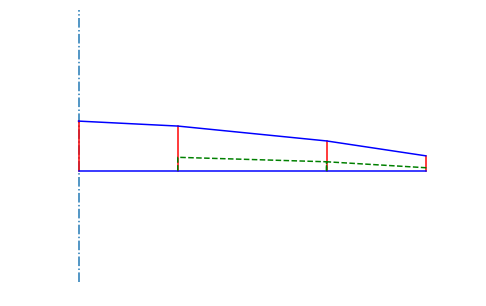

In [16]:
span_positions = [0, 2, 5, 7]
chord_lengths = [1, 0.9, 0.6, 0.3]
offsets = [0, 0.1, 0.4, 0.7]
twists = [0]*4
airfoils = [None]*4

twists2 = [0, 0, np.deg2rad(-1), np.deg2rad(-2)]

plt.figure(figsize=(8,5))

wing = WingExt.create_from_planform(span_positions, chord_lengths, offsets, twists, airfoils);
wing.set_root_pos(0.0)
wing.set_airbrake(1.5,2.9)
wing.set_flap('flap', 2, 5,[0.3,0.3])
wing.set_flap('flap2', 5, 7, [0.3,0.2])

wing2 = WingExt.create_from_planform(span_positions, chord_lengths, offsets, twists2, airfoils)
wing2.set_root_pos(0.7)

wing.plot()
plt.savefig('wing.png')

## Analyse Objekte werden erstellt und Berechnungsergebnisse geplottet

/home/jonathan/Programmieren/wingstructure/wingstructure/analysis.py:16: UserWarning: No airfoil database defined, using default airfoil.
  warn('No airfoil database defined, using default airfoil.')
/home/jonathan/.anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


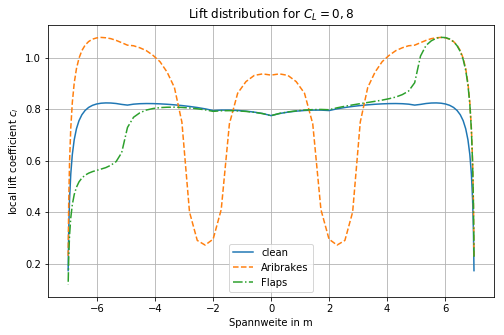

In [14]:
import matplotlib as mpl

liftana = LiftAnalysis(wing)

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
span_pos = liftana.calculation_positions

α, distribution = liftana.calculate(lift=0.8)
α_ab, distribution_ab = liftana.calculate(lift=0.8, airbrake=True)
α_qr, distribution_q = liftana.calculate(lift=0.8, flap_deflections={'flap2':[np.radians(5),np.radians(-5)]})

plt.figure(figsize=(8,5))
plt.plot(span_pos, distribution, label='clean')
plt.plot(span_pos, distribution_ab, '--', label='Aribrakes')
plt.plot(span_pos, distribution_q, '-.', label='Flaps')
plt.xlabel('Spannweite in m')
plt.ylabel('local lift coefficient $c_l$')
plt.title('Lift distribution for $C_L = 0,8$')
plt.grid()
plt.legend()
plt.savefig('Liftdistribution.png')
